In [2]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 50 kB 2.3 MB/s 
     |████████████████████████████████| 62 kB 1.4 MB/s 
     |████████████████████████████████| 110 kB 18.7 MB/s 
     |████████████████████████████████| 128 kB 9.4 MB/s 
     |████████████████████████████████| 4.0 MB 43.7 MB/s 
     |████████████████████████████████| 112 kB 12.9 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf


In [4]:
start = '2010-01-01'
end = '2019-12-31'

df = yf.download('AAPL',start,end)
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.515213,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.526476,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.422665,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.410793,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.453412,447610800


In [5]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-12-23,70.132500,71.062500,70.092499,71.000000,69.557114,98572000
2019-12-24,71.172501,71.222504,70.730003,71.067497,69.623222,48478800
2019-12-26,71.205002,72.495003,71.175003,72.477501,71.004578,93121200
2019-12-27,72.779999,73.492500,72.029999,72.449997,70.977638,146266000
2019-12-30,72.364998,73.172501,71.305000,72.879997,71.398895,144114400


In [6]:
df = df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.515213,493729600
1,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.526476,601904800
2,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.422665,552160000
3,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.410793,477131200
4,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.453412,447610800


In [7]:
df = df.drop(['Date','Adj Close'], axis = 1)
df.head()

,Open,High,Low,Close,Volume
0,7.622500,7.660714,7.585000,7.643214,493729600
1,7.664286,7.699643,7.616071,7.656429,601904800
2,7.656429,7.686786,7.526786,7.534643,552160000
3,7.562500,7.571429,7.466071,7.520714,477131200
4,7.510714,7.571429,7.466429,7.570714,447610800


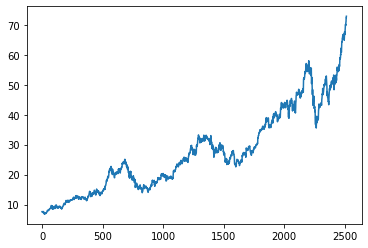

In [8]:
plt.plot(df.Close)

In [9]:
df

,Open,High,Low,Close,Volume
0,7.622500,7.660714,7.585000,7.643214,493729600
1,7.664286,7.699643,7.616071,7.656429,601904800
2,7.656429,7.686786,7.526786,7.534643,552160000
3,7.562500,7.571429,7.466071,7.520714,477131200
4,7.510714,7.571429,7.466429,7.570714,447610800
...,...,...,...,...,...
2510,70.132500,71.062500,70.092499,71.000000,98572000
2511,71.172501,71.222504,70.730003,71.067497,48478800
2512,71.205002,72.495003,71.175003,72.477501,93121200
2513,72.779999,73.492500,72.029999,72.449997,146266000


In [10]:
#moving average(100 days) = mean of prevoius hundred closing values

In [11]:
ma100 = df.Close.rolling(100).mean()
ma100

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2510    59.201075
2511    59.401700
2512    59.643125
2513    59.875125
2514    60.106325
Name: Close, Length: 2515, dtype: float64

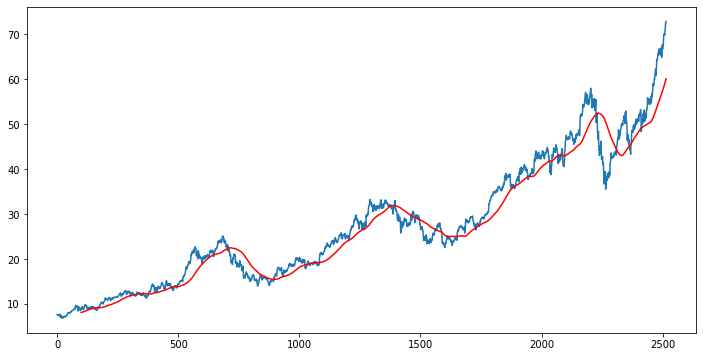

In [12]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')


In [13]:
ma200 = df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2510    54.132313
2511    54.261513
2512    54.396763
2513    54.529350
2514    54.661100
Name: Close, Length: 2515, dtype: float64

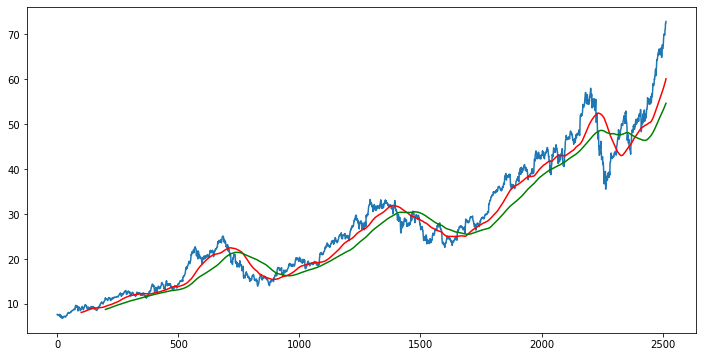

In [14]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')


In [15]:
df.shape

(2515, 5)

In [16]:
#spliting data into training and testing

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70) : int(len(df))])

print(data_training.shape)
print(data_testing.shape)


(1760, 1)
(755, 1)


In [17]:
data_training.head()

,Close
0,7.643214
1,7.656429
2,7.534643
3,7.520714
4,7.570714


In [18]:
data_testing.head()

,Close
1760,29.182501
1761,28.955000
1762,29.037500
1763,29.004999
1764,29.152500


In [19]:
#scaling down the training data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))

In [20]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.02971782],
       [0.03021854],
       [0.02560389],
       ...,
       [0.84388656],
       [0.85089656],
       [0.84616011]])

In [21]:
import numpy as np

In [22]:
x_train = []
y_train = []

for i in range(100,data_training_array.shape[0]):
  x_train.append(data_training_array[i-100:i])
  y_train.append(data_training_array[i,0])   #considering only one column 
  #value on a particular day depends on the previous 100 days

x_train,y_train = np.array(x_train) , np.array(y_train)


In [23]:
#ML Model

In [24]:
from keras.layers import Dense, Dropout , LSTM
from keras.models import Sequential

In [25]:
x_train.shape

(1660, 100, 1)

In [27]:
model=Sequential()

model.add(LSTM (units = 50,return_sequences = True,
                input_shape = (x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM (units = 60,return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM (units = 80,return_sequences = True))
model.add(Dropout(0.4))


model.add(LSTM (units = 120))
model.add(Dropout(0.5))


model.add(Dense(units = 1))  #dense layer to connect all the above layers

In [28]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)              

In [30]:
model.compile(optimizer = 'adam',loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
52/52 [==============================] - 24s 295ms/step - loss: 0.0285
Epoch 2/50
52/52 [==============================] - 16s 301ms/step - loss: 0.0074
Epoch 3/50
52/52 [==============================] - 16s 317ms/step - loss: 0.0068
Epoch 4/50
52/52 [==============================] - 17s 316ms/step - loss: 0.0074
Epoch 5/50
52/52 [==============================] - 17s 334ms/step - loss: 0.0062
Epoch 6/50
52/52 [==============================] - 17s 320ms/step - loss: 0.0055
Epoch 7/50
52/52 [==============================] - 16s 302ms/step - loss: 0.0049
Epoch 8/50
52/52 [==============================] - 16s 304ms/step - loss: 0.0050
Epoch 9/50
52/52 [==============================] - 16s 310ms/step - loss: 0.0057
Epoch 10/50
52/52 [==============================] - 16s 300ms/step - loss: 0.0051
Epoch 11/50
52/52 [==============================] - 16s 300ms/step - loss: 0.0045
Epoch 12/50
52/52 [==============================] - 15s 291ms/step - loss: 0.0047
Epoch 13/50
5

In [31]:
model.save('keras_model.h5')

In [32]:
data_testing.head()

,Close
1760,29.182501
1761,28.955000
1762,29.037500
1763,29.004999
1764,29.152500


In [33]:
data_training.tail(100)

,Close
1660,27.092501
1661,27.202499
1662,27.000000
1663,26.982500
1664,27.045000
...,...
1755,29.264999
1756,29.072500
1757,29.129999
1758,29.315001


In [34]:
past_100_days = data_training.tail(100)

In [35]:
final_df = past_100_days.append(data_testing,ignore_index = True)

In [36]:
final_df

,Close
0,27.092501
1,27.202499
2,27.000000
3,26.982500
4,27.045000
...,...
850,71.000000
851,71.067497
852,72.477501
853,72.449997


In [37]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.02781467],
       [0.03015022],
       [0.02585064],
       [0.02547908],
       [0.02680611],
       [0.03370671],
       [0.03317586],
       [0.03232658],
       [0.03158344],
       [0.03306972],
       [0.02855781],
       [0.03036255],
       [0.02600988],
       [0.02356814],
       [0.02022403],
       [0.01958704],
       [0.01523437],
       [0.01576518],
       [0.01910933],
       [0.02441747],
       [0.02425819],
       [0.02776158],
       [0.01268645],
       [0.        ],
       [0.01226183],
       [0.02558522],
       [0.04586231],
       [0.06603324],
       [0.06258295],
       [0.05547006],
       [0.05541697],
       [0.05531082],
       [0.06099053],
       [0.05085197],
       [0.05175434],
       [0.05286905],
       [0.05743405],
       [0.04803866],
       [0.05265676],
       [0.04984341],
       [0.05239133],
       [0.05265676],
       [0.05711557],
       [0.05801795],
       [0.06858117],
       [0.0699082 ],
       [0.07542863],
       [0.073

In [38]:
input_data.shape

(855, 1)

In [39]:
x_test = []
y_test = []

for i in range (100,input_data.shape[0]):
  x_test.append(input_data[i-100:i])
  y_test.append(input_data[i,0])  

In [40]:
x_test, y_test = np.array(x_test) , np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(755, 100, 1)
(755,)


In [41]:
#making predictions 

y_predicted = model.predict(x_test)

24/24 [==============================] - 7s 85ms/step


In [43]:
y_predicted.shape

(755, 1)

In [44]:
y_test

array([0.0721907 , 0.06736028, 0.06911197, 0.06842189, 0.07155371,
       0.07845431, 0.08418707, 0.08482406, 0.08822126, 0.08556719,
       0.08445249, 0.0895483 , 0.0894952 , 0.0883805 , 0.0895483 ,
       0.08997296, 0.08938906, 0.09952758, 0.0998461 , 0.09989915,
       0.09820055, 0.09671427, 0.1359945 , 0.1348267 , 0.1377462 ,
       0.144169  , 0.15075112, 0.15345824, 0.15547536, 0.1538829 ,
       0.16009341, 0.16927655, 0.17187748, 0.17102824, 0.17299223,
       0.17819418, 0.18037053, 0.1772918 , 0.17798189, 0.17941503,
       0.17973358, 0.1945963 , 0.19019062, 0.19454325, 0.19220766,
       0.19316316, 0.19040291, 0.18870427, 0.19114605, 0.19146452,
       0.19034986, 0.19815283, 0.19937368, 0.195658  , 0.20346096,
       0.19486173, 0.20324859, 0.20059453, 0.19910825, 0.20038224,
       0.21588199, 0.21758055, 0.21657199, 0.21513885, 0.21535114,
       0.22103089, 0.21704978, 0.21513885, 0.21344021, 0.21253783,
       0.20436334, 0.20526571, 0.20128461, 0.20542495, 0.20208

In [45]:
y_predicted

array([[0.07541934],
       [0.07540832],
       [0.07500339],
       [0.07427999],
       [0.07335976],
       [0.07248412],
       [0.07206602],
       [0.07251582],
       [0.07394531],
       [0.0762642 ],
       [0.0790801 ],
       [0.08189359],
       [0.08446968],
       [0.08668649],
       [0.08844024],
       [0.08972219],
       [0.0905903 ],
       [0.09110534],
       [0.09166601],
       [0.09256542],
       [0.09386116],
       [0.0953722 ],
       [0.09680949],
       [0.0992406 ],
       [0.10333589],
       [0.10906965],
       [0.11603311],
       [0.12370178],
       [0.13146758],
       [0.13874595],
       [0.14497456],
       [0.14999497],
       [0.15413226],
       [0.1577521 ],
       [0.16098449],
       [0.16386047],
       [0.16651025],
       [0.16904789],
       [0.17135559],
       [0.17329603],
       [0.17483193],
       [0.175989  ],
       [0.17733172],
       [0.1790724 ],
       [0.18127693],
       [0.18372302],
       [0.18613404],
       [0.188

In [46]:
scaler.scale_  #this will give a factor by which all the values were scaled down

array([0.02123255])

In [47]:
scale_factor = 1/0.02123255
y_predicted = y_predicted * scale_factor
y_test =  y_test * scale_factor

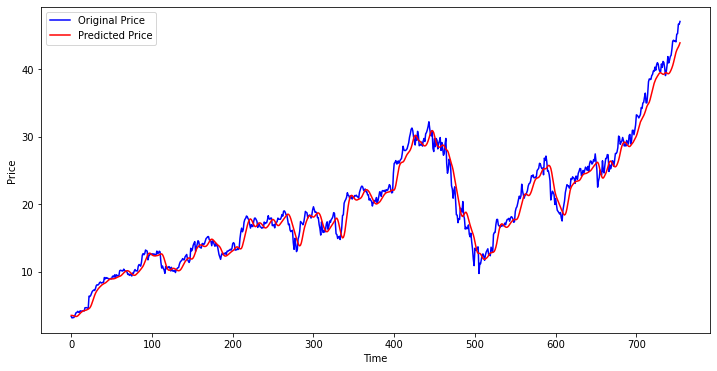

In [48]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b',label = 'Original Price')
plt.plot(y_predicted,'r',label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()
